In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tour=pd.read_csv("tour_package.csv")
tour.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [3]:
tour.shape

(4888, 20)

In [4]:
tour.size

97760

In [5]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# PROBLEM

In [6]:
tour1=tour.copy()

In [7]:
tour.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Observations

In [8]:
#there are many missing values
#prodtaken is the target variable as that indicates whether they have taken a package or not
#Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.

In [9]:
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


### Observations

Minimum age of customer is 18 and Maximum age is 61 with mean of 37.

Mean Duration of pitch is 15 mins to max of 127 mins.

Mean Number of trips is 3 with maximum of 22.This needs to be verified

Average monthly income of customer is 23619 with maximum of 98678. This needs to be verified

920 customer had taken package last time.

# Data Preprocessing

### Droping customer id

In [10]:
tour.drop(["CustomerID"],axis=1,inplace=True)

In [11]:
tour.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [12]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [18]:
for i in cat_cols:
    print (tour  [i].value_counts())

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
0    3968
1     920
Name: ProdTaken, dtype: int64
1    3032
0    1856
Name: OwnCar, dtype: int64
0    3466
1    1422
Name: Passport, dtype: int64
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


the unique values of designation is observed

920 people took the packages for their trips

3032 people own a car

3466 people have passport

3190 for first tier,1500 for third tier and 198 for second tier in city tier

2340 married ,950 divorced ,916 singles 682 unmarried travled,single and unmarried are not same unmarried traveled with partner

1842 basic,1732 deluxe,742 std,342 super deluxe,230 king were opted

female and fe male are same need to be fixed

3 star property is prefered by customes



In [19]:
tour["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [20]:
tour['Gender'] = tour['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [21]:
tour["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [22]:
tour[cat_cols]=tour[cat_cols].astype("category")

In [23]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [24]:
#the category columns changed data types to category as the values in the category columns will be fixed

### Age

In [25]:
tour.describe(include=["category"]).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


In [26]:
tour["Age"].describe().T

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [27]:
tour['Agebin'] = pd.cut(tour['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [34]:
tour["Agebin"].value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

### Income

In [35]:
tour["MonthlyIncome"].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [36]:
tour['Incomebin'] = pd.cut(tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [38]:
tour["Incomebin"].value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

# EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS


In [39]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\2720974953.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple',ax=ax_dis)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\2720974953.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='purple'

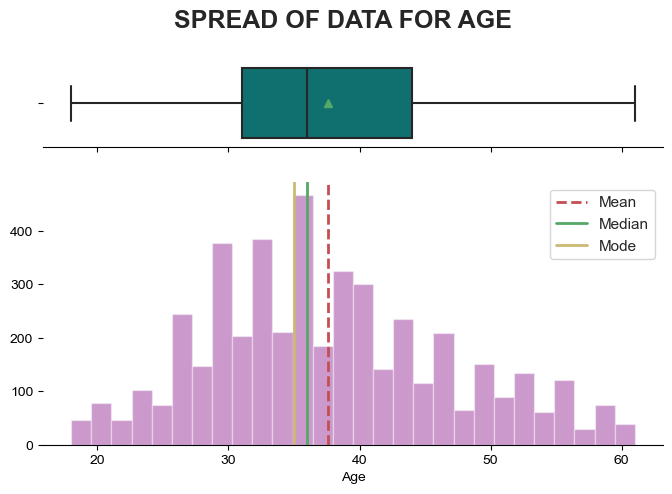

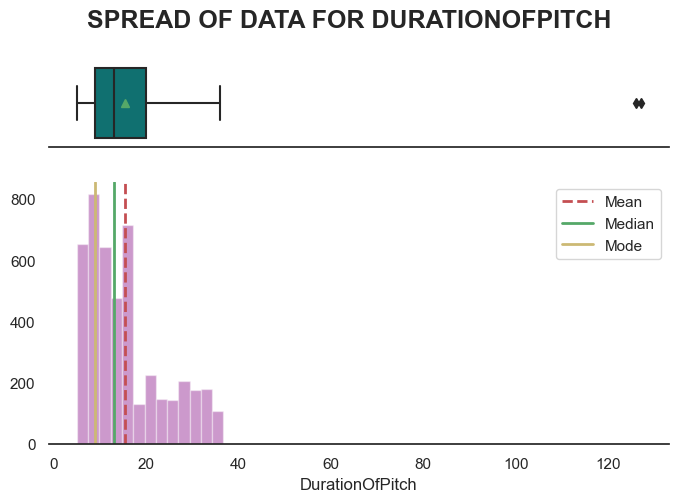

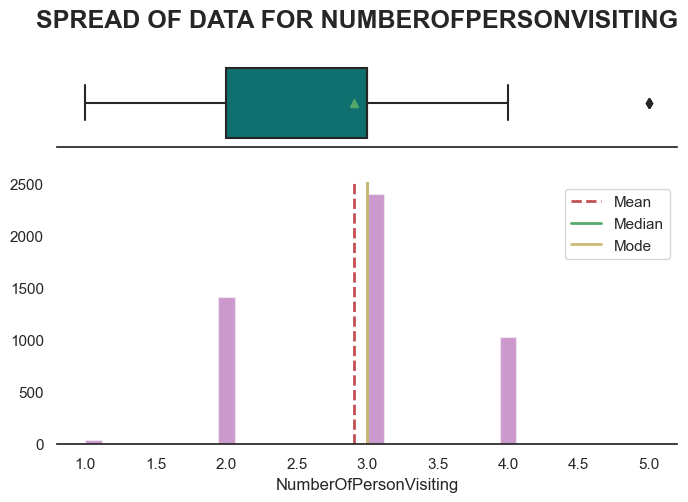

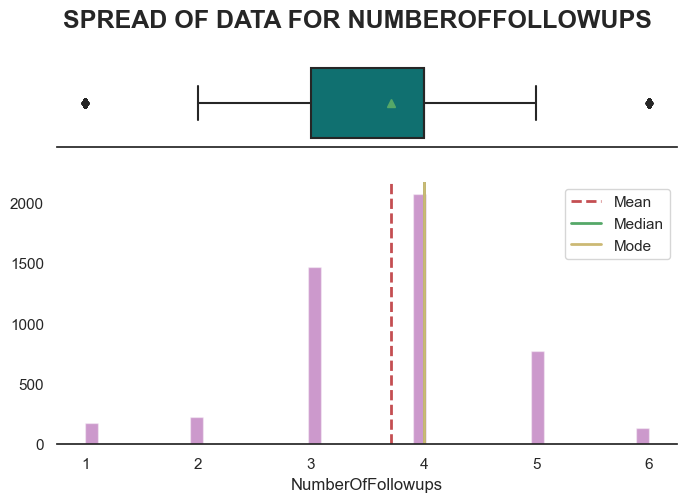

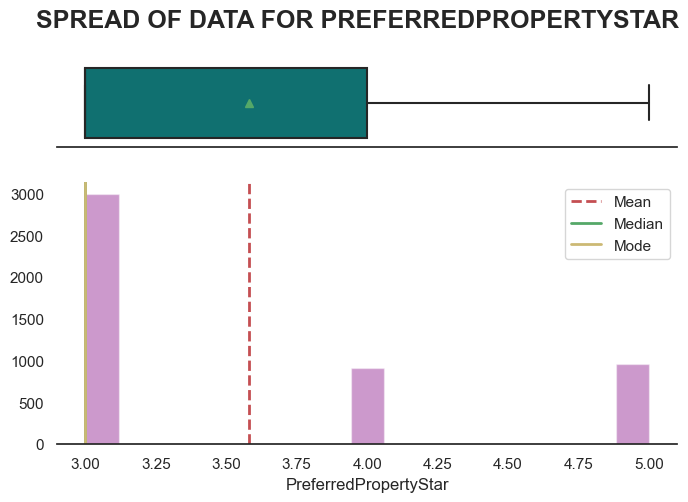

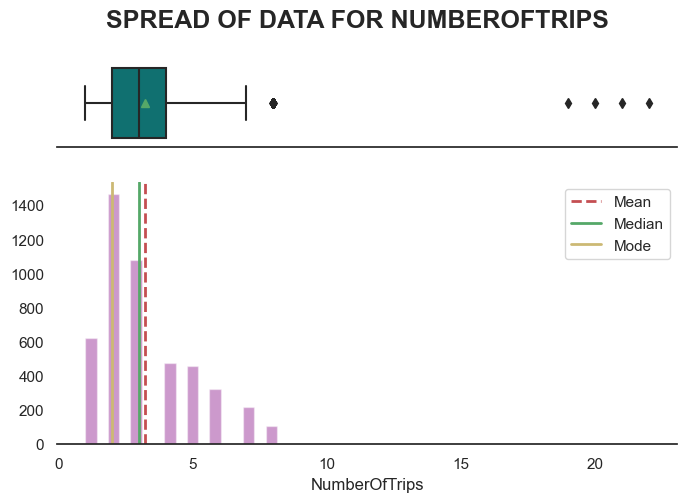

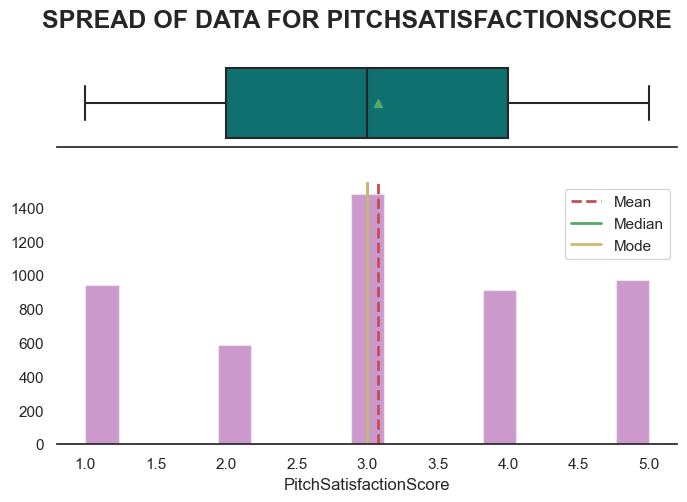

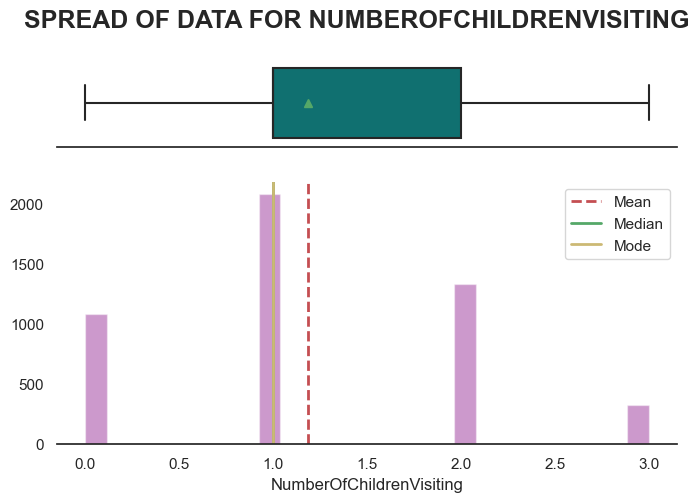

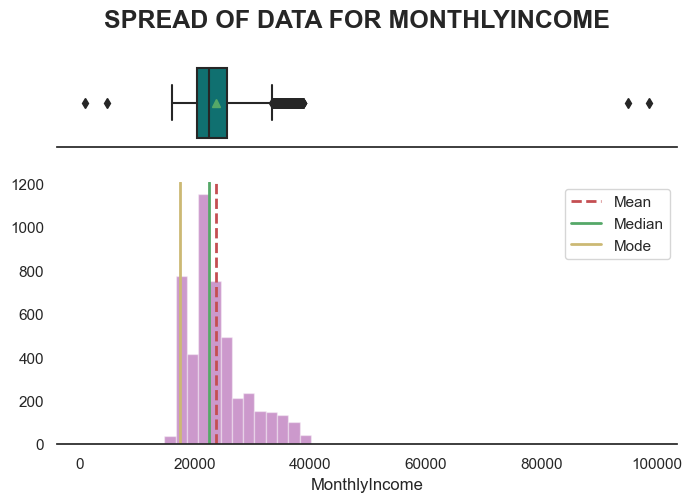

In [41]:
#select all quantitative columns for checking the spread
list_col=  tour.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(tour[list_col[i]])

### Observations

Age is normally distrubted and doesn't have any outliers

Duration of pitch is Right skewed with some outliers greater than 120 .Need to see if this are to be treated.

Number of visitors is usually 3 with a outlier of 5.

Average number of folows up are 4 with extreme of 6

Number of trips is right skewed with some outliers where trips are greater than 17.

Monthly income is Right skewed. and has some outlier as higher end.

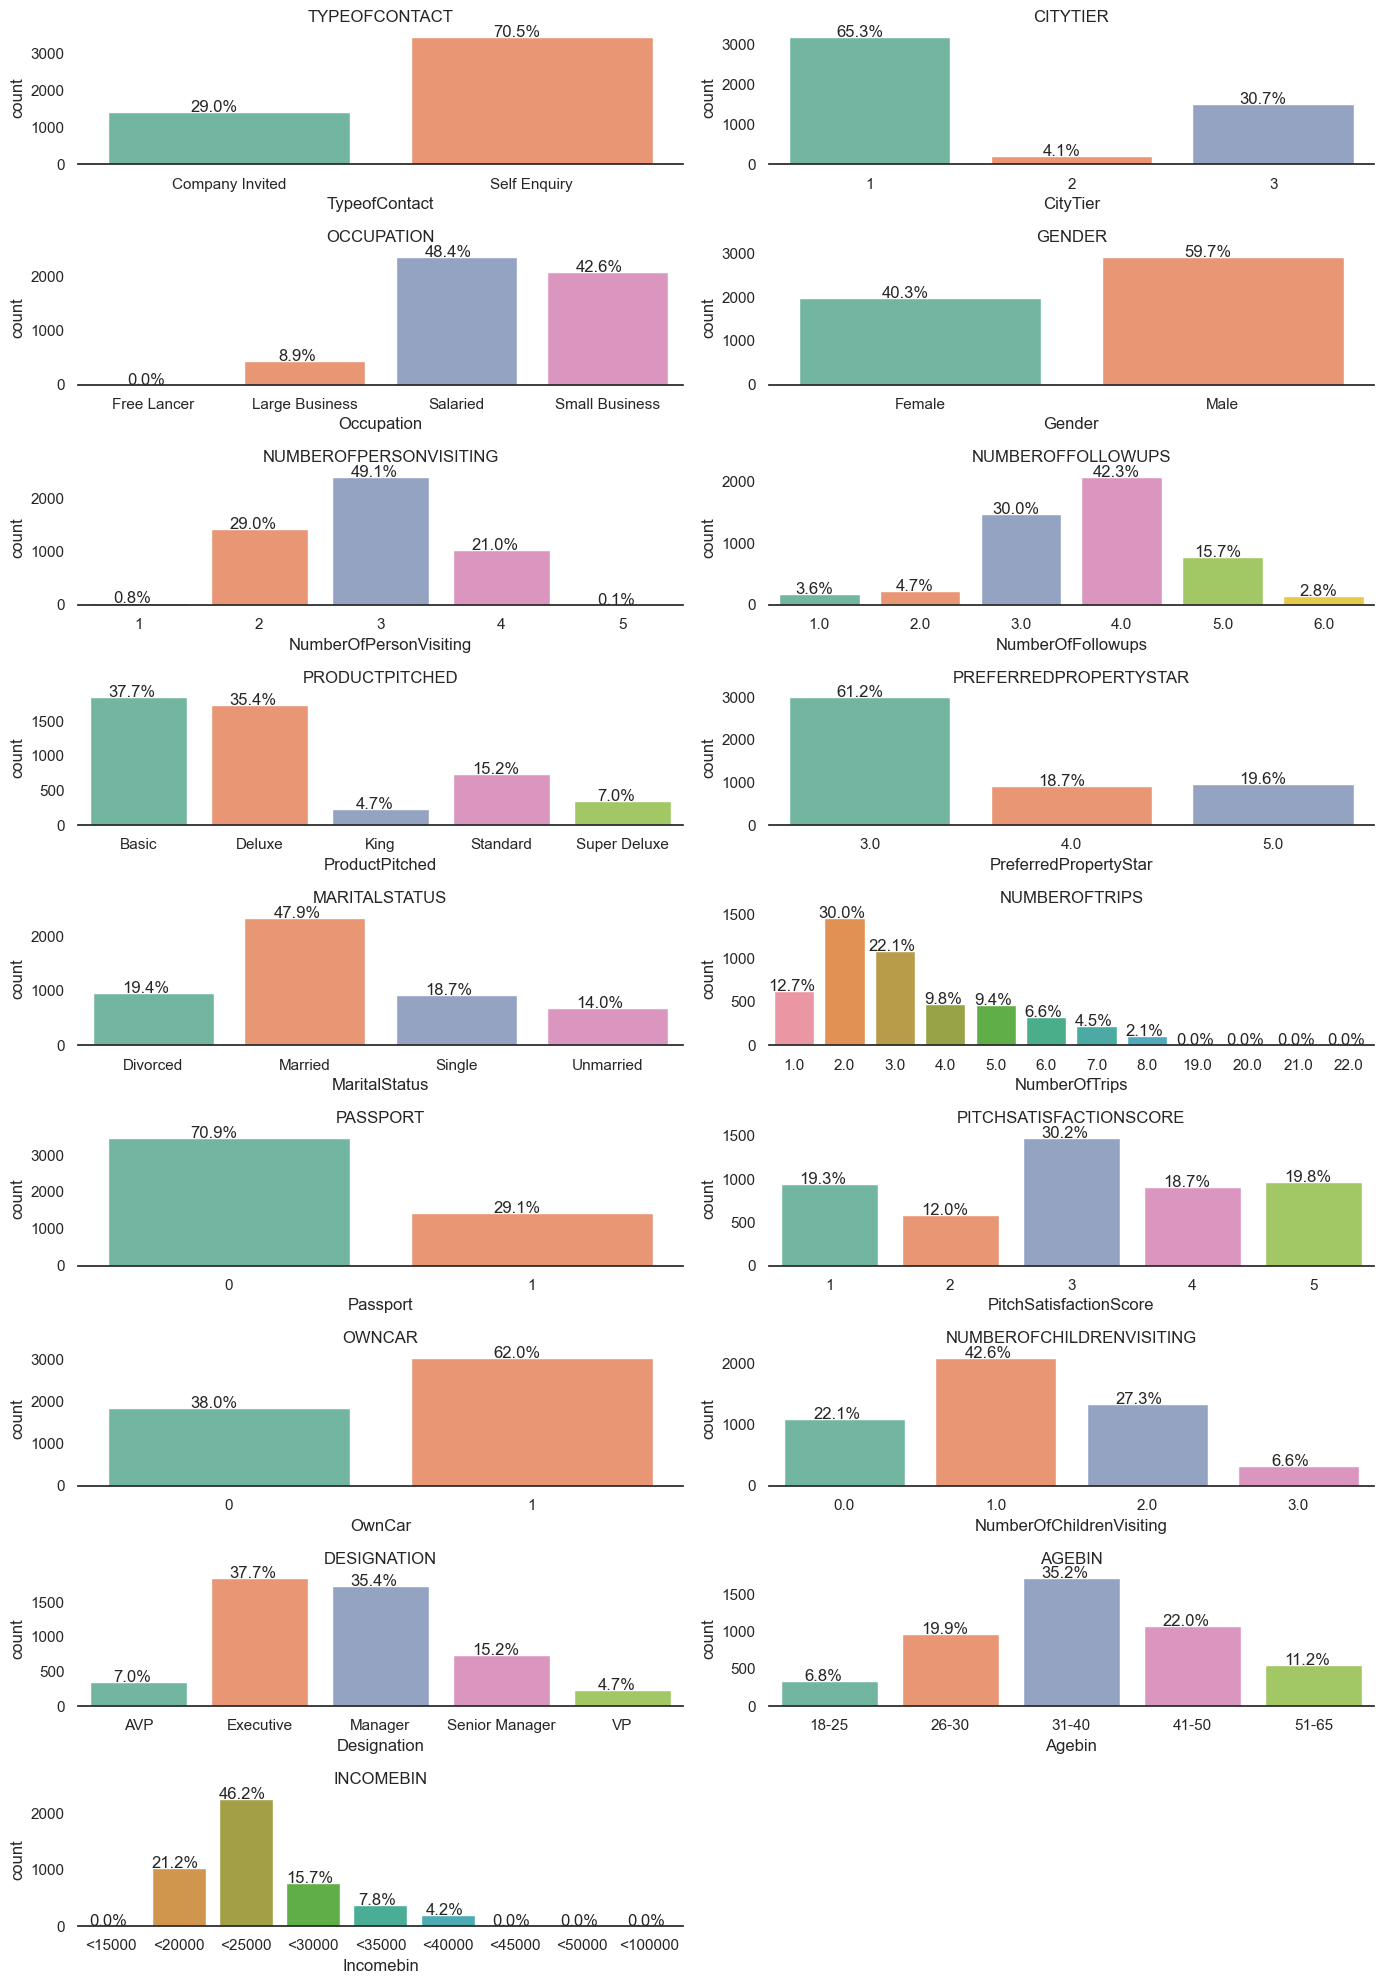

In [44]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 
        'Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = tour[variable].value_counts(ascending=False).index   
             #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=tour[variable], data=tour )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(tour[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())
                                     

### Observations

~38 % customers are Executive, followed by 35% are managers.

~18% customers accepted product offered last time.

~ 62 % customer own car.

~29 % customers has a passport.

~ 65 % customers are from Tier 1 cities.

~ 61 % customers prefer 3 star property.

~ 48 % customers are married

Basic package was pitched to ~ 38 % of customers and 35 % were pitched Deluxe package.

60 % customers are male.

Occupation of ~ 49 % customer is salaried.

70.5 % customer self enquiried for the packages.

Most of the customers travelled along with 3 people.

Most of the customers take 2 trips per year but as seen previously there are some extreme values like 22.

Most of the customers travelled with only one child.

Most of the customers were followed up 4 times.

Majority of customer monthly income is in 20000-25000 range.Most customer fall in 15000-30000 monthly income range.

~35% are in 31-40 Age group. Most customer are in 26-50 age range

# Bivariate & Multivariate Analysis

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\1015300635.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tour.corr(),annot=True)


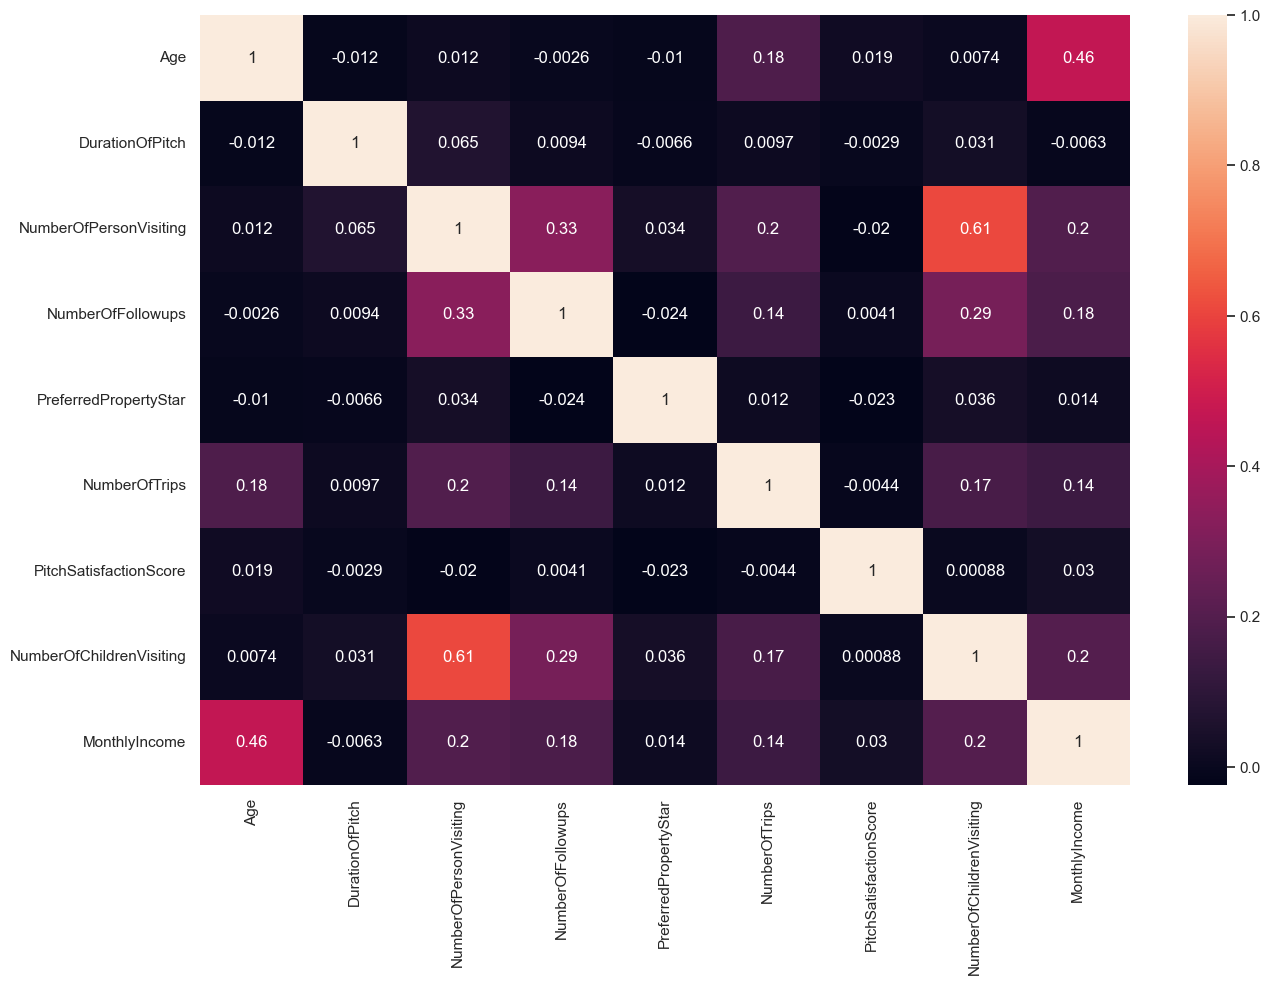

In [45]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(tour.corr(),annot=True)
plt.show()

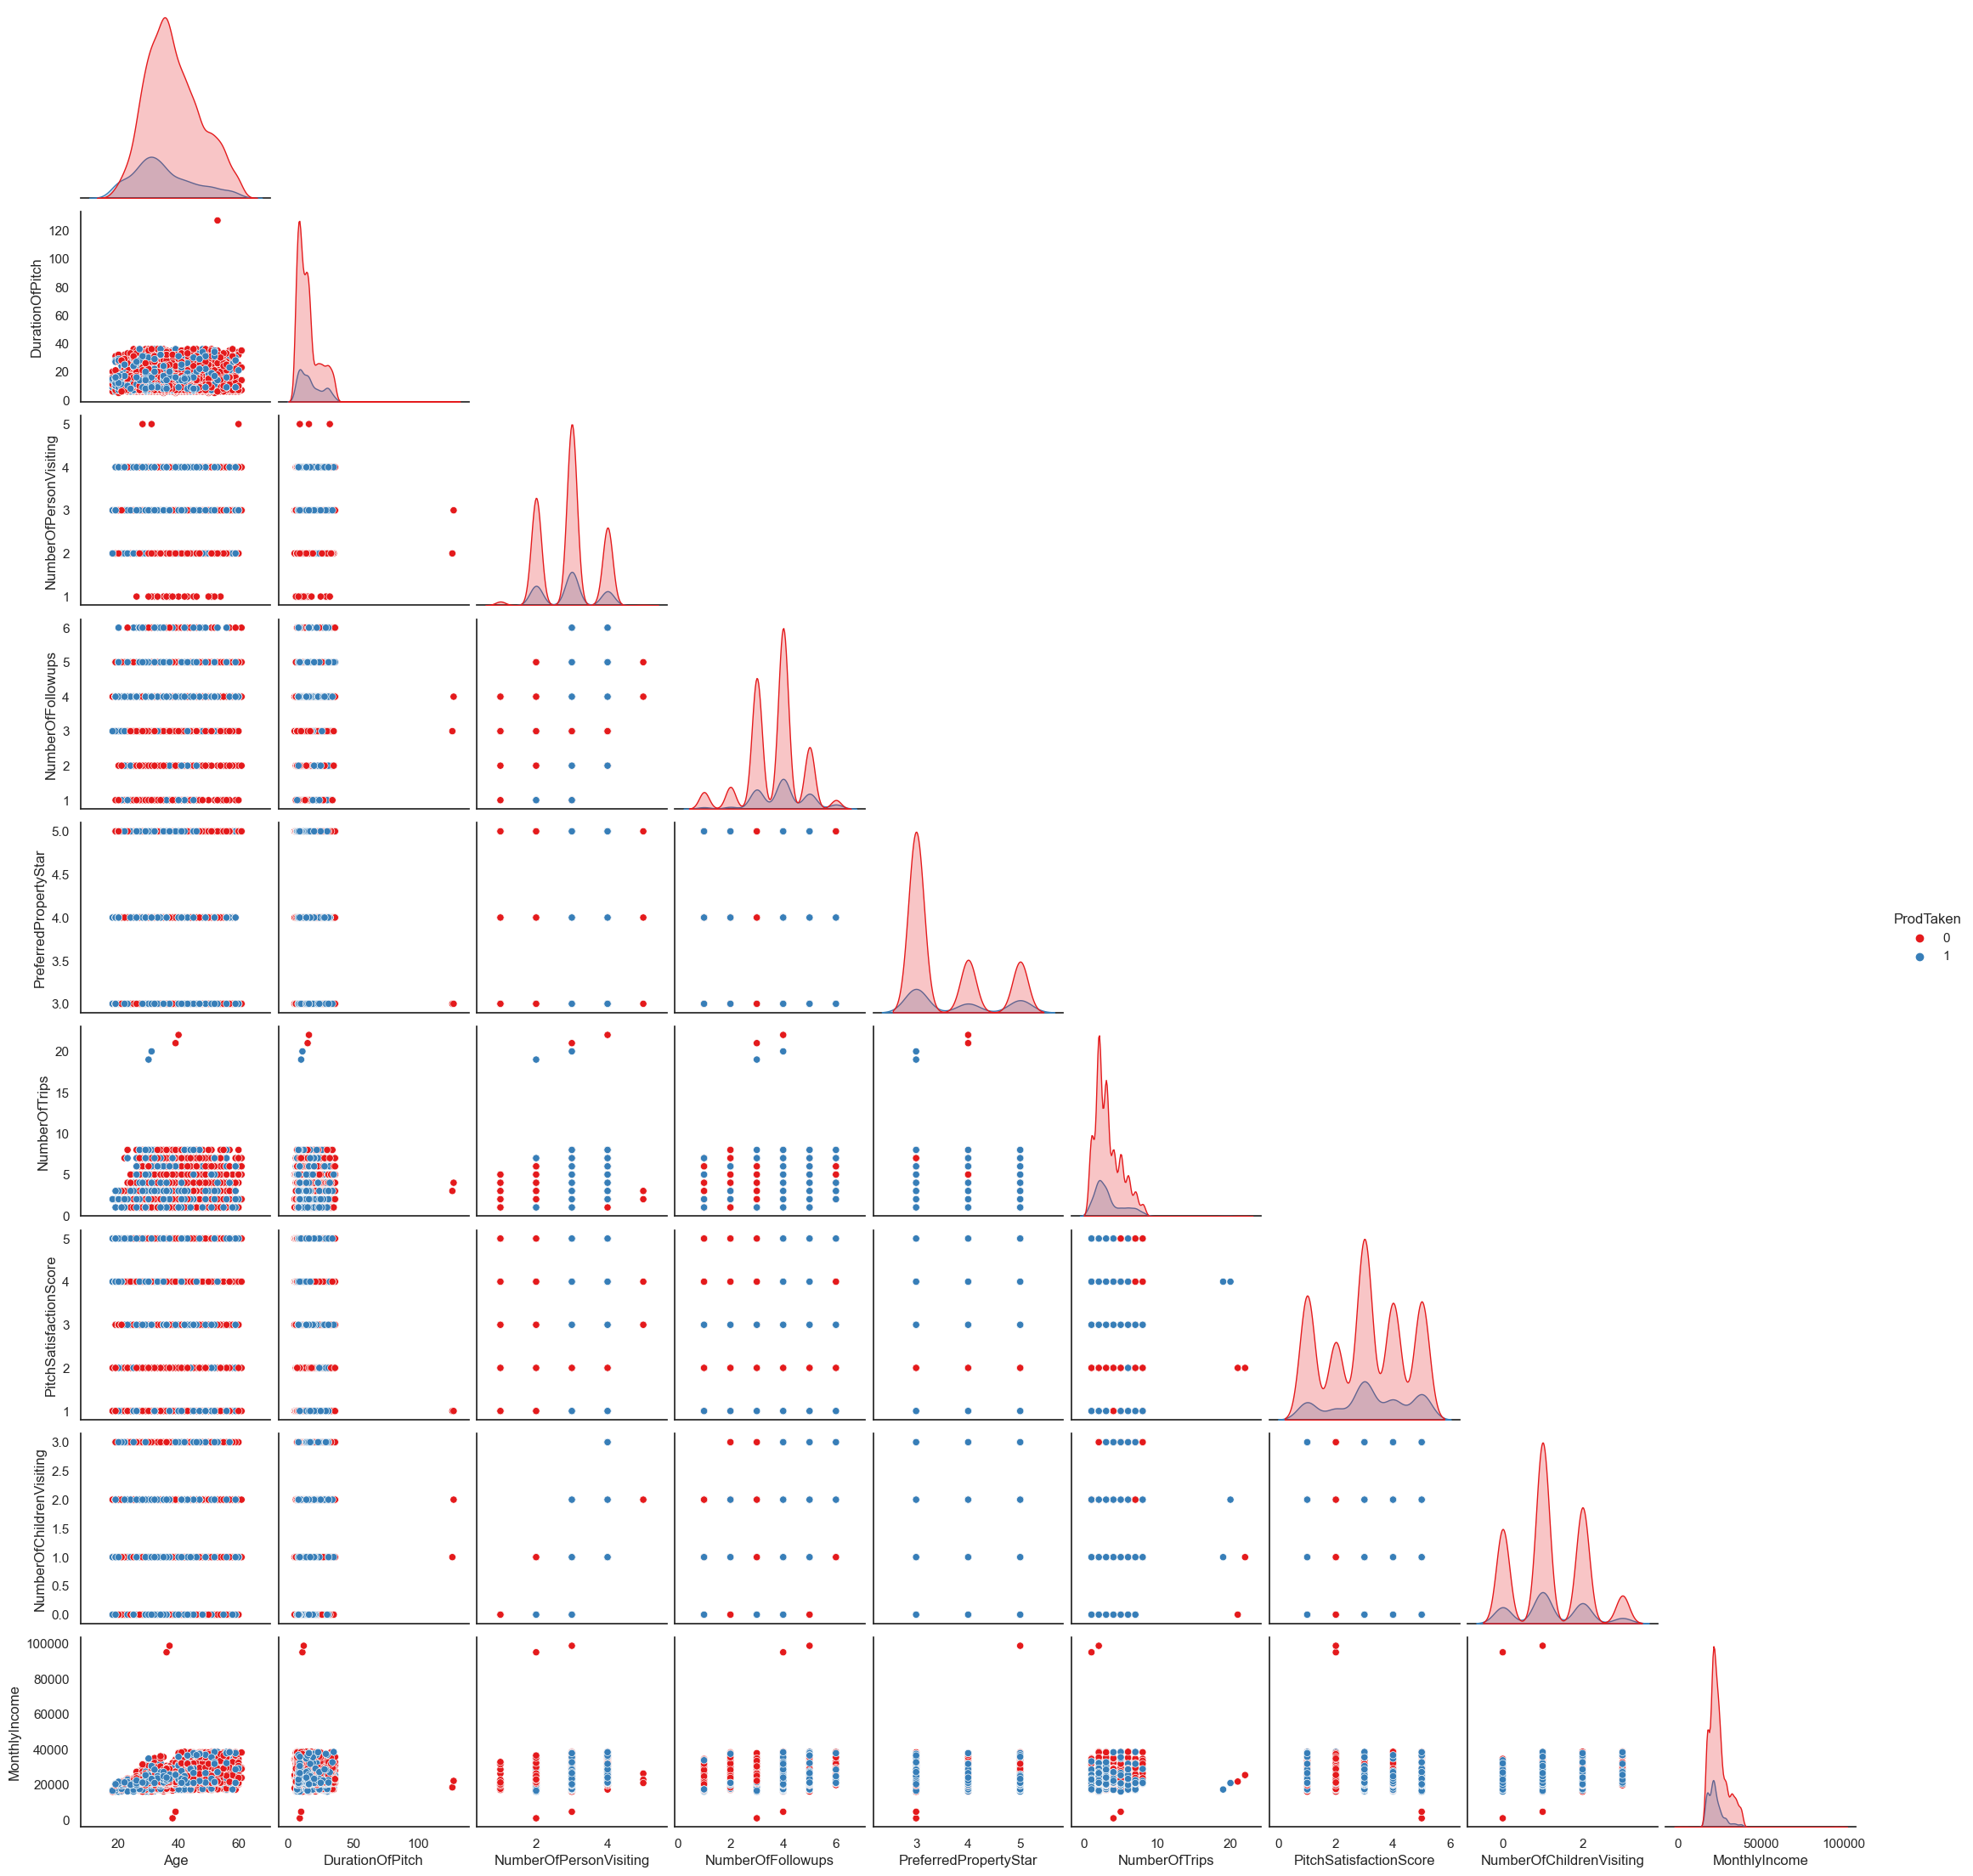

In [47]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(tour, hue="ProdTaken",corner=True)
plt.show()

### Observations

Monthlyincome and Age has weak correlation

Number of children visiting and number of person vsiting has correlation as expected.

Numberof follow up and number of person vsiting has very weak correlation

In [59]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(tour[(tour[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(tour[(tour[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
    sns.boxplot(tour[target],tour[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(tour[target],tour[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\305998192.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tour[(tour[target] == 0)][x],ax=axs[0,0],color='teal')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\305998192.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tour[(tour[target] 

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

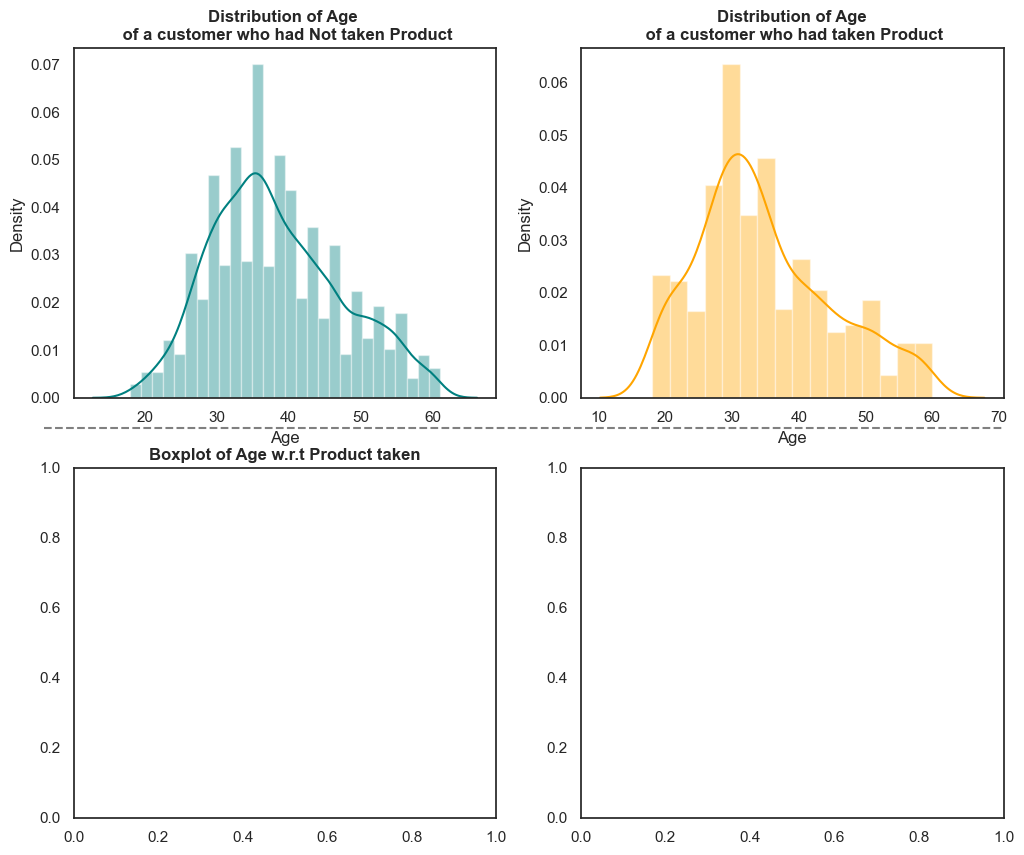

In [60]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=tour.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])
   


### Observation

Customers who purchased the product are mostly in age range of 28 -35

Duration of pitch suprisingly for customer who purchased product where 10- 40 min. There are some outliers in duration of pitch 
for customers who didn't take the product

Number of trips has some outliers like 17 -20.

Monthly income has extreme outliers.Customers who purchased product are in earning on average 18000-23000 monthly

C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Monthly Income vs Occupation')

C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\hello world\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


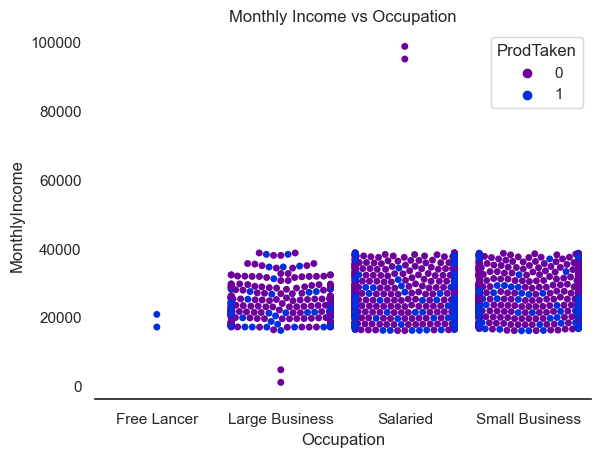

In [61]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Occupation',hue='ProdTaken',data=tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

Text(0.5, 1.0, 'Monthly Income vs Age')

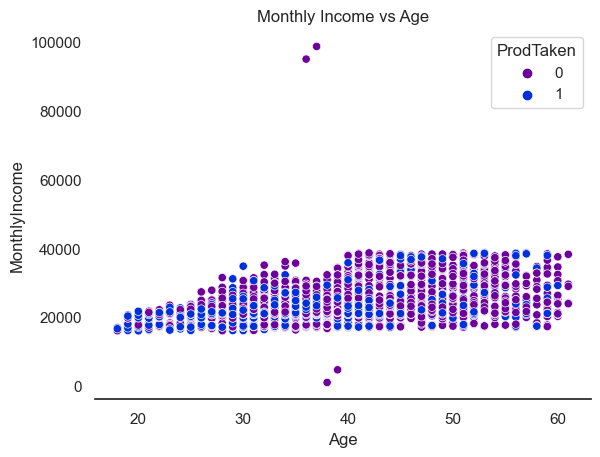

In [62]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age')

# Missing value Detection and Treatment

In [63]:
tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [64]:
tour['TypeofContact'].value_counts()
#Highest ocurring value is Self Inquiry. We will impute the missing value for TypeofContact using the mode(highest occuring value) of the feature

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [66]:
tour['TypeofContact'].mode()

tour['TypeofContact']=tour['TypeofContact'].fillna('Self Enquiry')

In [67]:
tour["TypeofContact"].isnull().sum()

0

In [69]:
tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

tour['NumberOfFollowups']=tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\2755788565.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour['NumberOfFollowups']=tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))


In [70]:
#Look at few rows where values  is missing
tour[tour["PreferredPropertyStar"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,31-40,<100000
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,...,Single,5.0,0,5,1,1.0,VP,38604.0,51-65,<40000
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Divorced,2.0,0,2,1,2.0,VP,38677.0,51-65,<40000
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,...,Divorced,7.0,1,2,1,3.0,VP,38537.0,51-65,<40000
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,...,Married,3.0,0,4,1,1.0,VP,38651.0,41-50,<40000
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,...,Divorced,3.0,0,3,1,1.0,VP,38523.0,51-65,<40000
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,...,Married,2.0,0,5,1,2.0,VP,38305.0,41-50,<40000
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,...,Married,6.0,0,4,0,3.0,VP,38621.0,51-65,<40000
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,...,Divorced,5.0,0,5,1,3.0,VP,38418.0,41-50,<40000
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,...,Married,6.0,1,4,1,2.0,VP,38525.0,51-65,<40000


In [72]:
tour['PreferredPropertyStar']=tour.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

tour[tour["PreferredPropertyStar"].isnull()]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\742506850.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour['PreferredPropertyStar']=tour.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


Let see how can we impute Duration of pitch.In my opinion an important factor for how long sale person take times to market his sales pitch depends on Product which sale person is proposing , number of followup will also decide duration of pitch. Let verify this

In [73]:
tour.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
tour["DurationOfPitch"] = tour.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\3327055096.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour["DurationOfPitch"] = tour.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(


In [75]:
tour[tour["DurationOfPitch"].isnull()]

tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [76]:
tour.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

In [77]:
# Impute missing NumberOfTrips of pitch with median value
tour["NumberOfTrips"] = tour.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\4061381766.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour["NumberOfTrips"] = tour.groupby(["MaritalStatus"])["NumberOfTrips"].apply(


In [78]:
tour[tour["NumberOfChildrenVisiting"].isnull()].head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,...,Single,4.0,0,5,1,NaN,VP,34926.0,41-50,<35000
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,...,Divorced,1.0,0,2,1,NaN,VP,34999.0,51-65,<35000
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,...,Divorced,6.0,1,2,1,NaN,VP,34859.0,51-65,<35000
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,...,Married,2.0,0,4,1,NaN,VP,34973.0,41-50,<35000
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,...,Divorced,2.0,0,3,1,NaN,VP,34845.0,51-65,<35000
851,0,56.0,Self Enquiry,1,10.0,Large Business,Female,3,3.0,King,...,Married,5.0,0,4,0,NaN,VP,34943.0,51-65,<35000
898,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,King,...,Divorced,4.0,0,5,1,NaN,VP,34740.0,41-50,<35000
918,0,51.0,Company Invited,3,15.0,Salaried,Male,2,3.0,King,...,Married,5.0,1,4,1,NaN,VP,34847.0,51-65,<35000
956,0,56.0,Self Enquiry,2,14.0,Salaried,Male,2,3.0,King,...,Single,7.0,0,4,1,NaN,VP,34717.0,51-65,<35000
1009,0,58.0,Self Enquiry,1,6.0,Small Business,Female,3,3.0,King,...,Divorced,4.0,1,1,1,NaN,VP,34701.0,51-65,<35000


In [80]:
# Impute missing NumberOfChildrenVisited with 0
tour['NumberOfChildrenVisiting']=tour['NumberOfChildrenVisiting'].fillna(0)

Imputing age using designation,gender,Martial status would give more granularity

In [81]:
tour[tour["Age"].isnull()].head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,NaN,<20000
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,...,Single,1.0,1,3,0,0.0,Manager,NaN,NaN,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,...,Single,6.0,1,4,0,1.0,Executive,NaN,NaN,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,...,Married,1.0,0,3,1,2.0,Manager,NaN,NaN,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,...,Single,1.0,0,2,0,0.0,Manager,18407.0,NaN,<20000
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,...,Single,2.0,1,4,1,2.0,Executive,NaN,NaN,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,...,Single,2.0,0,3,1,0.0,Manager,NaN,NaN,NaN
51,1,NaN,Self Enquiry,1,11.0,Large Business,Male,2,3.0,Basic,...,Single,2.0,1,2,1,0.0,Executive,18441.0,NaN,<20000
54,0,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,...,Divorced,1.0,1,2,1,0.0,Manager,NaN,NaN,NaN
57,0,NaN,Self Enquiry,1,29.0,Small Business,Female,1,3.0,Basic,...,Divorced,4.0,1,4,1,0.0,Executive,NaN,NaN,NaN


In [82]:
tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
tour["Age"] = tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\3587037088.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour["Age"] = tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(


In [83]:
tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()
#For more granularity imputing on occupation,Designation,GendeR

Occupation      Designation     Gender
Free Lancer     AVP             Female        NaN
                                Male          NaN
                Executive       Female        NaN
                                Male      18929.0
                Manager         Female        NaN
                                Male          NaN
                Senior Manager  Female        NaN
                                Male          NaN
                VP              Female        NaN
                                Male          NaN
Large Business  AVP             Female    31872.0
                                Male      29959.0
                Executive       Female    20748.0
                                Male      20743.5
                Manager         Female    22198.5
                                Male      21997.0
                Senior Manager  Female    28266.0
                                Male      26838.5
                VP              Female    36583.0
           

In [84]:
tour["MonthlyIncome"]=tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7564\2305123331.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  tour["MonthlyIncome"]=tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(


In [85]:
tour.isna().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
Agebin                      240
Incomebin                   233
dtype: int64

In [86]:
tour.Age.describe()

count    4888.000000
mean       37.413564
std         9.162798
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [87]:
tour['Agebin'] = pd.cut(tour['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [88]:
tour.Agebin.value_counts()

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

Income

To understand customers segments derving new columns which will help us identify if customer in different income range

In [89]:
tour.MonthlyIncome.describe()

count     4888.000000
mean     23543.855769
std       5267.651455
min       1000.000000
25%      20438.250000
50%      22393.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [90]:
tour['Incomebin'] = pd.cut(tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [91]:
tour.Incomebin.value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

In [92]:
tour.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

In [93]:
cust_prof=tour[tour['ProdTaken']==1]

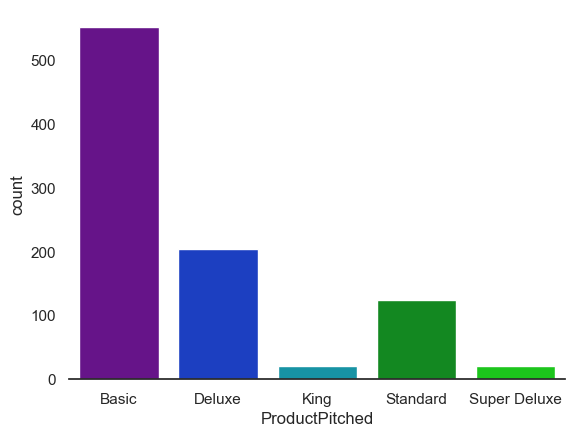

In [94]:
#plt.figure(figsize= [12,12])

sns.countplot(x="ProductPitched", data=cust_prof)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

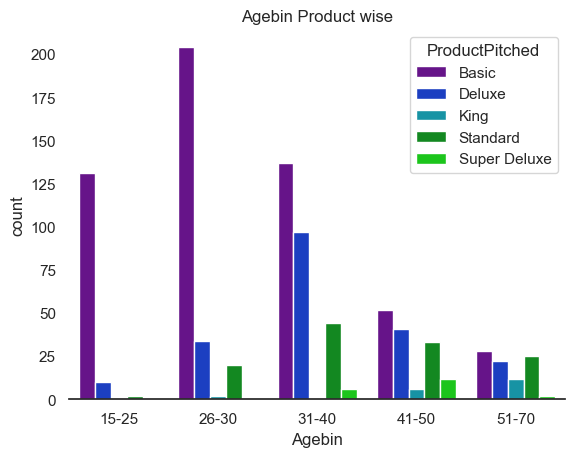

In [95]:
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')
#sns.catplot(x='Agebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

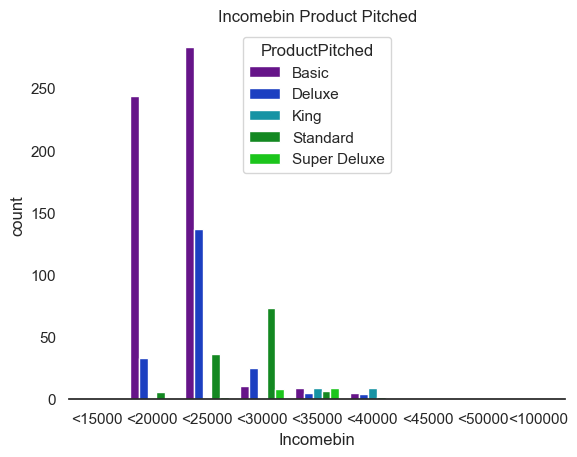

In [96]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
#sns.catplot(x='Incomebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

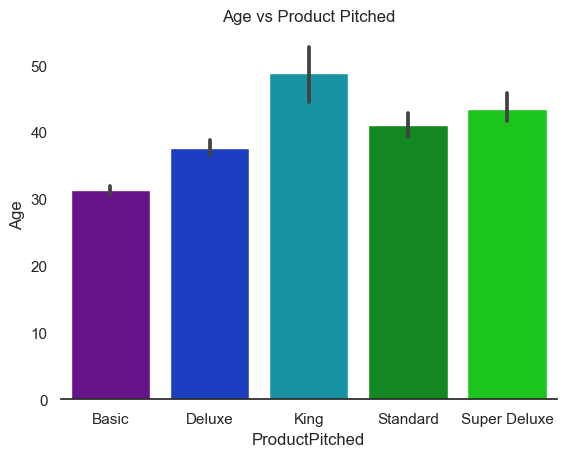

In [97]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')
#sns.catplot(y='Age',x='ProductPitched',col='ProdTaken',data=df_tour,kind='bar',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

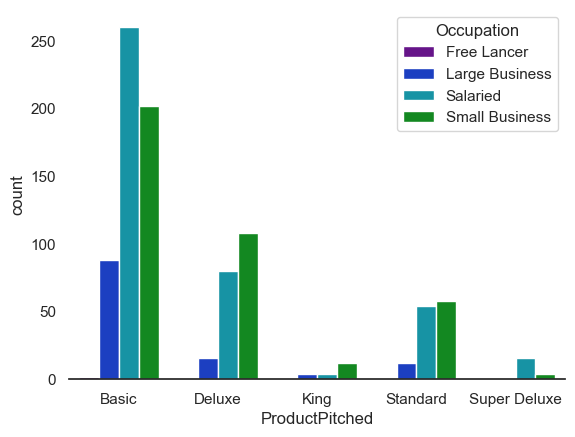

In [98]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")
#sns.catplot(hue='Occupation',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

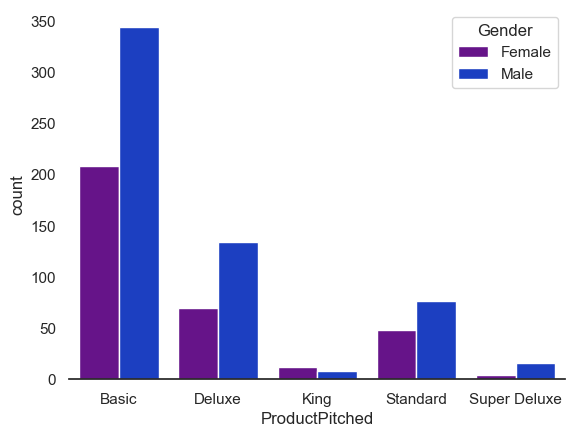

In [99]:
#sns.catplot(hue='Gender',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

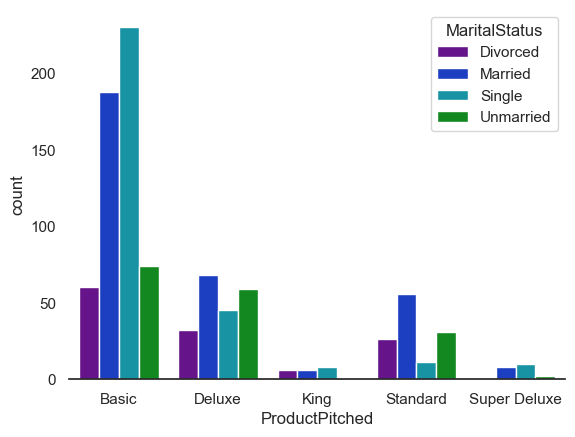

In [100]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

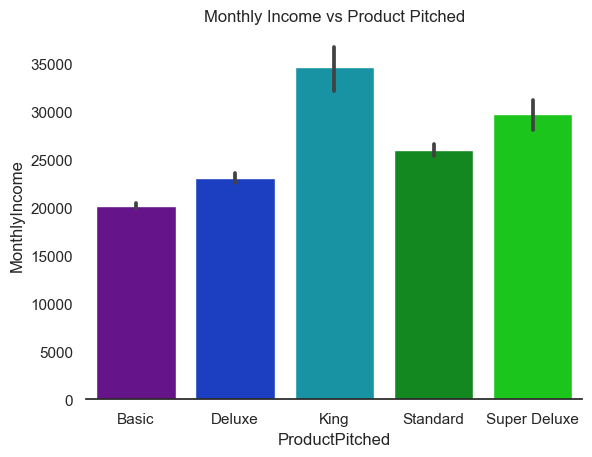

In [101]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

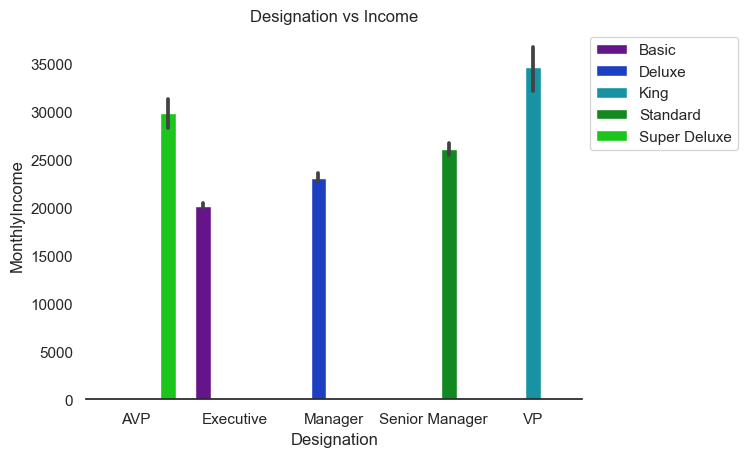

In [102]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))

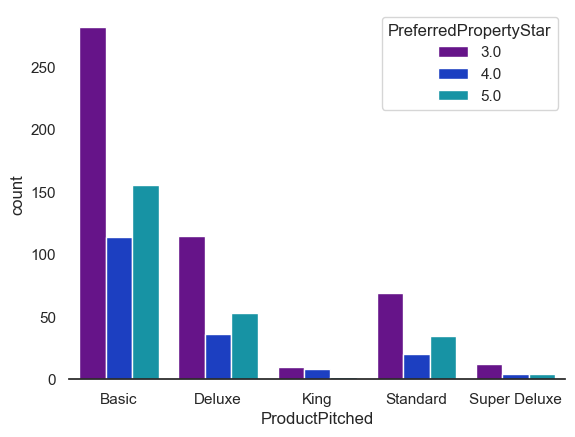

In [105]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

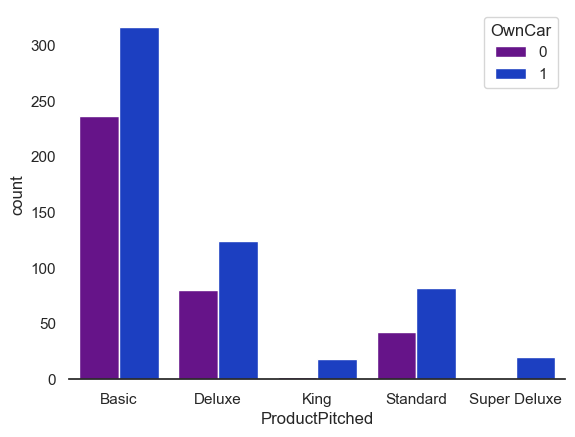

In [106]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

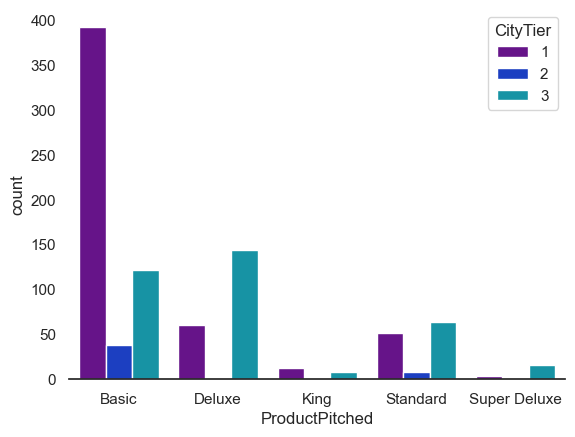

In [107]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# Conclusion
Looking at feature importance Designation , Passport, Tier city , martial status,occupation are most important features.Income can also be looked into, few of other models have given higher importance to Income as well.


Gender,number of children visiting, having a car seemed to be insignificant

# insights

Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package are:

Having a higher duration of pitch by salesman to the customer.

Getting a PitchSatisfactionScore of 3 or 5.

Having multiple follow ups with the customers.

Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.

Mostly Single customers are accpeting a package , reason may be married couples might has kids , provding a property , with child care services can get married couples to accept the product.